# EVALUACIÓN DE ETIQUETADORES MORFOSINTÁCTICOS PARA EL ESPAÑOL
### Lingüística Computacional 2021/2022

Germán Pescador Barreto

Adrián Vázquez Barrera

## Tarea 1

Evaluación del etiquetador ‘hmm’ sobre el corpus ‘cess-esp’ utilizando el juego de categorías completo y reducido.

Utilizando el etiquetador hmm basado en modelos de Markov, se realizará una validación cruzada sobre 10 particiones del corpus. 

Barajar el corpus antes de realizar las particiones. Presentar los resultados en forma de tabla y gráficamente, incluyendo los intervalos de confianza.

In [ ]:
import nltk
nltk.download('cess_esp')
from nltk.corpus import cess_esp
from nltk.tag import hmm
from random import shuffle

corpus_sentences = [ x for x in cess_esp.tagged_sents()]

shuffle(corpus_sentences)

procesed_sentences = []

for sentence in corpus_sentences:

    words = []

    for word in sentence:

        if ("*0*" not in word[0]):

            lenght = 2

            if (word[1][0].lower() == "v" or word[1][0].lower() == "f"):
                lenght = 3

            lenght = min(lenght, len(word[1]))

            words.append((word[0], word[1][0:lenght]))

    procesed_sentences.append(words)

corpus_sentences_reduced = procesed_sentences

print("\nDataset preview: " + str(corpus_sentences[0][0:10]))
print("\nDataset reduced preview: " + str(corpus_sentences_reduced[0][0:10]))

print(f"\nOriginal dataset size: {len(corpus_sentences_reduced)}")
print(f"\nReduced dataset size: {len(corpus_sentences)}")



[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!

Dataset preview: [('El', 'da0ms0'), ('ariete', 'ncms000'), (',', 'Fc'), ('sancionado', 'aq0msp'), ('con', 'sps00'), ('dos', 'dn0cp0'), ('partidos', 'ncmp000'), ('por', 'sps00'), ('una', 'di0fs0'), ('acción', 'ncfs000')]

Dataset reduced preview: [('El', 'da'), ('ariete', 'nc'), (',', 'Fc'), ('sancionado', 'aq'), ('con', 'sp'), ('dos', 'dn'), ('partidos', 'nc'), ('por', 'sp'), ('una', 'di'), ('acción', 'nc')]

Original dataset size: 6030

Reduced dataset size: 6030


In [ ]:
# Función auxiliar que, dada una lista 'a' y un número 'n', devuelve una lista de listas con el contenido de 'a' en 'n' trozos
def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

In [ ]:
partitions = 10

cross_val_data_orig = list(split(corpus_sentences, partitions))
cross_val_data_redu = list(split(corpus_sentences_reduced, partitions))

print(cross_val_data_orig[1][1][0:5])
print(cross_val_data_redu[1][1][0:5])


[('La', 'da0fs0'), ('moneda', 'ncfs000'), ('nacional', 'aq0cs0'), ('checa', 'aq0fs0'), (',', 'Fc')]
[('La', 'da'), ('moneda', 'nc'), ('nacional', 'aq'), ('checa', 'aq'), (',', 'Fc')]


In [ ]:
import itertools
from numpy import sqrt

accs_hmm_orig = []
accs_hmm_redu = []
ic_hmm_orig = []
ic_hmm_redu = []


for i in range(partitions):
  
  cross_test_orig = cross_val_data_orig[i]
  cross_train_orig = list(itertools.chain.from_iterable([cross_val_data_orig[j] for j in range(partitions) if i is not j]))

  cross_test_redu = cross_val_data_redu[i]
  cross_train_redu = list(itertools.chain.from_iterable([cross_val_data_redu[j] for j in range(partitions) if i is not j]))

  num_words_train_orig = 0
  num_words_train_redu = 0
    
  for sentence in cross_train_orig:
    for word in sentence:
      num_words_train_orig += 1

  for sentence in cross_train_redu:
    for word in sentence:
      num_words_train_redu += 1

In [ ]:
#Entrenar modelos
hmm_tagger_orig = hmm.HiddenMarkovModelTagger.train(cross_train_orig)
hmm_tagger_redu = hmm.HiddenMarkovModelTagger.train(cross_train_redu)

#Evaluar modelos
hmm_eval_orig = hmm_tagger_orig.evaluate(cross_test_orig)
hmm_eval_redu = hmm_tagger_redu.evaluate(cross_test_redu)

accs_hmm_orig.append(hmm_eval_orig)
accs_hmm_redu.append(hmm_eval_redu)

ic_hmm_orig.append(1.96 *(sqrt((hmm_eval_orig * (1-hmm_eval_orig)) / num_words_train_orig)))
ic_hmm_redu.append(1.96 *(sqrt((hmm_eval_redu * (1-hmm_eval_redu)) / num_words_train_redu)))

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

def plot_cv( results, ic, type):
  figure(figsize=(10, 8), dpi=80)
  x=[i for i in range(partitions)]
  y= results
  plt.axis([-1, 10, 0.89, 0.94])
  plt.ylabel('Accuracy')
  plt.xlabel('Fold')
  plt.title(f"{partitions}-fold cross validation " + type + " dataset")
  plt.plot(x,y,'ro')
  plt.errorbar(x, y, yerr=ic, linestyle='None')
  plt.show()



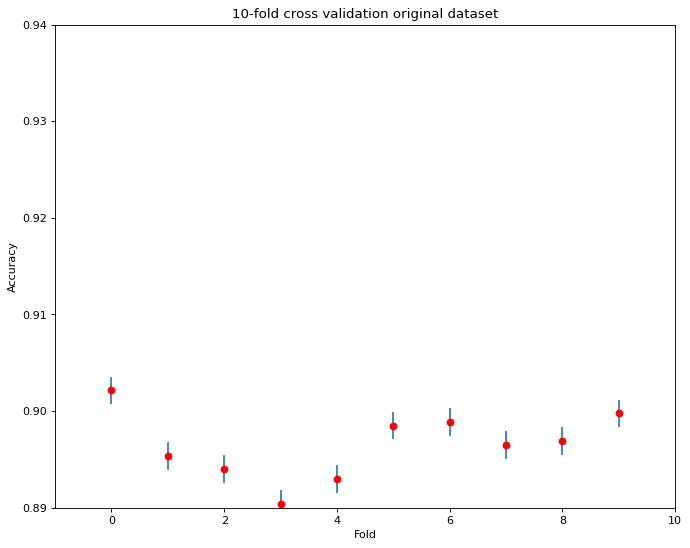

In [ ]:

plot_cv( accs_hmm_orig, ic_hmm_orig, "original")


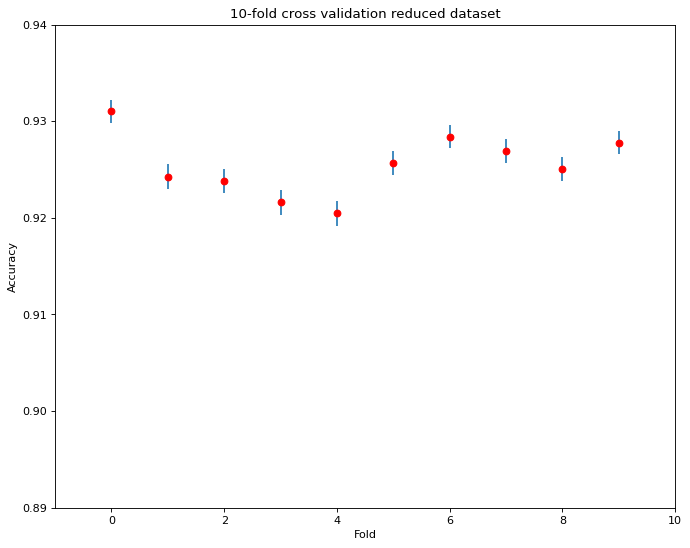

In [ ]:
plot_cv( accs_hmm_redu, ic_hmm_redu, "reduced")

In [ ]:
float_acc = 6;

original_mean = sum(accs_hmm_orig)/len(accs_hmm_orig)
reduced_mean = sum(accs_hmm_redu)/len(accs_hmm_redu)

print(f"Original dataset avg: {original_mean}")
print(f"Reduced dataset avg: {reduced_mean}")

print("\n\tFold \tacc_orig \tic_orig \tacc_redu \tic_redu")
for i in range(partitions):
  print(f"\n\t{i} \t{ round(accs_hmm_orig[i], float_acc)} \t±{round(ic_hmm_orig[i], float_acc)} \t{round(accs_hmm_redu[i], float_acc)} \t±{ round(ic_hmm_redu[i], float_acc)}")




Original dataset avg: 0.8965374735249396
Reduced dataset avg: 0.9254962112155795

	Fold 	acc_orig 	ic_orig 	acc_redu 	ic_redu

	0 	0.902139 	±0.001398 	0.931018 	±0.001204

	1 	0.895361 	±0.001443 	0.924278 	±0.00126

	2 	0.893981 	±0.001448 	0.923809 	±0.001261

	3 	0.890366 	±0.001469 	0.921614 	±0.001277

	4 	0.893 	±0.001455 	0.920461 	±0.001287

	5 	0.898486 	±0.001421 	0.92565 	±0.001247

	6 	0.898866 	±0.001418 	0.928411 	±0.001225

	7 	0.89653 	±0.001433 	0.926897 	±0.001237

	8 	0.89688 	±0.001431 	0.92503 	±0.001252

	9 	0.899765 	±0.001415 	0.927794 	±0.001232


## Tarea 2

Evaluación de las prestaciones del etiquetador respecto a la cantidad de datos de aprendizaje.

Se trata de estudiar cómo varían las prestaciones del etiquetador hmm cuando varía el tamaño del corpus de aprendizaje. Para este experimento se dividirá el corpus de entrenamiento en 10 partes de tamaño similar. La partición 10 se tomará como test, y las 9 particiones restantes se tomarán como entrenamiento. En cada ejecución, se irá incrementando sucesivamente el tamaño del corpus de entrenamiento, manteniendo fija la partición de test.

**Importante**: Para esta tarea **no es necesario** realizar la validación cruzada.

In [ ]:
def train_model(train, test):
  num_words_train = 0
    
  for sentence in train:
    for word in sentence:
      num_words_train += 1

  #Entrenar modelos
  hmm_tagger = hmm.HiddenMarkovModelTagger.train(train)
  #Evaluar modelos
  hmm_eval = hmm_tagger.evaluate(test)
  ic = (1.96 *(sqrt((hmm_eval * (1-hmm_eval)) / num_words_train)))

  return hmm_eval, ic

In [ ]:
import itertools
from numpy import sqrt

results = []
ics = []
for i in range(partitions-1):
  if i is not 0:
    train = list(itertools.chain.from_iterable([cross_val_data_orig[j] for j in range(i+1)]))
  else:
    train = cross_val_data_orig[0]
  x,y = train_model(train, cross_val_data_orig[partitions-1])
  results.append(x)
  ics.append(y)


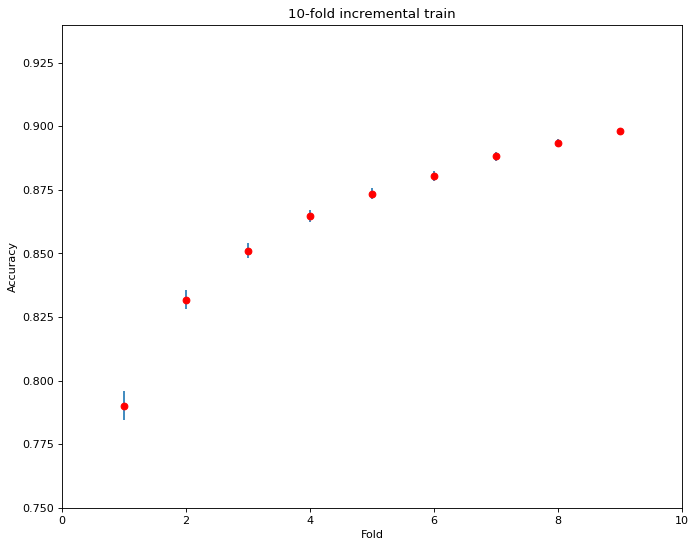

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

def plot_cv( results, ic):
  figure(figsize=(10, 8), dpi=80)
  x=[i for i in range(1, partitions)]
  y= results
  plt.axis([0, 10, 0.75, 0.94])
  plt.ylabel('Accuracy')
  plt.xlabel('Fold')
  plt.title(f"{partitions}-fold incremental train")
  plt.plot(x,y,'ro')
  plt.errorbar(x, y, yerr=ic, linestyle='None')
  plt.show()


plot_cv( results, ics)

In [ ]:
float_acc = 7;

print("\n\tFold \tAccuracies \tIC")
for i in range(partitions-1):
  print(f"\n\t{i} \t{round(results[i], float_acc)} \t±{round(ics[i], float_acc)}")


	Fold 	Accuracies 	IC

	0 	0.7863771 	±0.0058098

	1 	0.8292546 	±0.0037329

	2 	0.8509738 	±0.0028956

	3 	0.8656062 	±0.002407

	4 	0.8761599 	±0.0020791

	5 	0.8842154 	±0.0018446

	6 	0.8903844 	±0.0016687

	7 	0.8953809 	±0.0015294

	8 	0.8997655 	±0.0014149


## Tarea 3

Evaluación del método de suavizado para palabras desconocidas para el etiquetador tnt.

El etiquetador tnt por defecto no incorpora un método de suavizado para las palabras desconocidas. Utiliza un método basado en los sufijos de las palabras para construir un modelo para las palabras desconocidas (Affix Tagger). En base al sufijo de la palabra desconocida le asigna una categoría morfosintáctica. Este método funciona razonablemente bien para el inglés.
En concreto, se trata de estudiar diferentes longitudes del sufijo (número de letras que se tienen en cuenta) y estudiar cómo varían las prestaciones del etiquetador. Una vez se haya decidido el sufijo que mejores prestaciones proporciona, incorporarlo como modelo de suavizado al etiquetador tnt y comprobar si aumenta sus prestaciones.

In [ ]:
from nltk.tag import AffixTagger

In [ ]:
partition = 10
max_afix = 5

In [ ]:
def train_affix_model(train, test, affix_length):

  num_words_train = 0
  
  for sentence in train:
    for word in sentence:
      num_words_train += 1

  #Entrenar modelos
  aff_tagger = AffixTagger(train, affix_length=-affix_length)

  #Evaluar modelos
  aff_eval = aff_tagger.evaluate(test)

  #Intervalo de confianza
  ic = (1.96 *(sqrt((aff_eval * (1-aff_eval)) / num_words_train)))


  return aff_eval, ic

In [ ]:
import itertools
from numpy import sqrt

results_dic = {}
ics_dic = {}


for affix_length in range(1, max_afix+1):

  results = []
  ics = []

  for i in range(partition):

    test = cross_val_data_redu[i]
    train = list(itertools.chain.from_iterable([cross_val_data_redu[j] for j in range(partitions) if i is not j]))
    
    x,y = train_affix_model(train, test, affix_length)

    results.append(x)
    ics.append(y)

  results_dic[affix_length] = results
  ics_dic[affix_length] = ics

In [ ]:
mean_affix_fold_error = []

for affix_length in range(1, max_afix+1):
  mean_affix_error = sum(results_dic[affix_length])/len(results_dic[affix_length])
  print(f"Error medio para sufijos de tamaño:  {affix_length} : {mean_affix_error}")
  mean_affix_fold_error.append(mean_affix_error)

Error medio para sufijos de tamaño:  1 : 0.2447824670695927
Error medio para sufijos de tamaño:  2 : 0.2826476324885769
Error medio para sufijos de tamaño:  3 : 0.29551171707286816
Error medio para sufijos de tamaño:  4 : 0.26495546651475604
Error medio para sufijos de tamaño:  5 : 0.22548733134686777


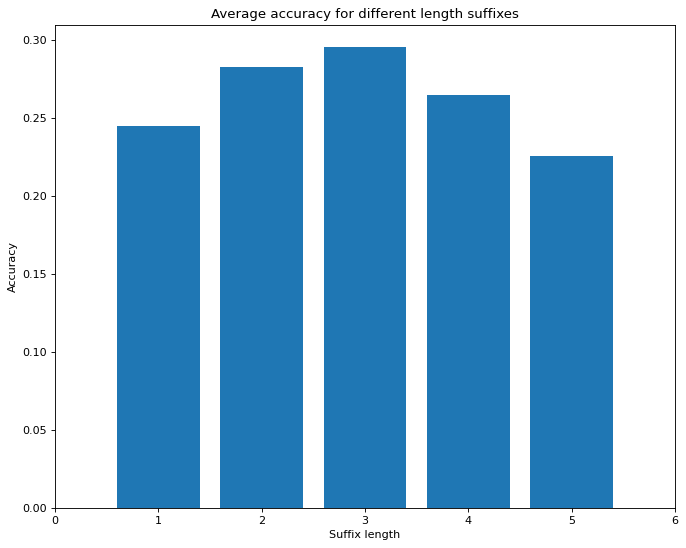

In [ ]:
figure(figsize=(10, 8), dpi=80)
x= range(1, max_afix+1)
y= mean_affix_fold_error
plt.axis([0, max_afix+1, 0, .31])
plt.ylabel('Accuracy')
plt.xlabel('Suffix length')
plt.title(f"Average accuracy for different length suffixes")
plt.bar(x, y)
plt.show()

In [ ]:
def plot_affix( results, ic, affix_length):

  figure(figsize=(10, 8), dpi=80)
  x=[i for i in range(1, len(results)+1)]
  y= results
  plt.axis([0, len(results)+1, 0.27, 0.31])
  plt.ylabel('Accuracy')
  plt.xlabel('Fold')
  plt.title(f"{partitions}-fold train {affix_length} afix")
  plt.plot(x,y,'ro')
  plt.errorbar(x, y, yerr=ic, linestyle='None')
  plt.show()

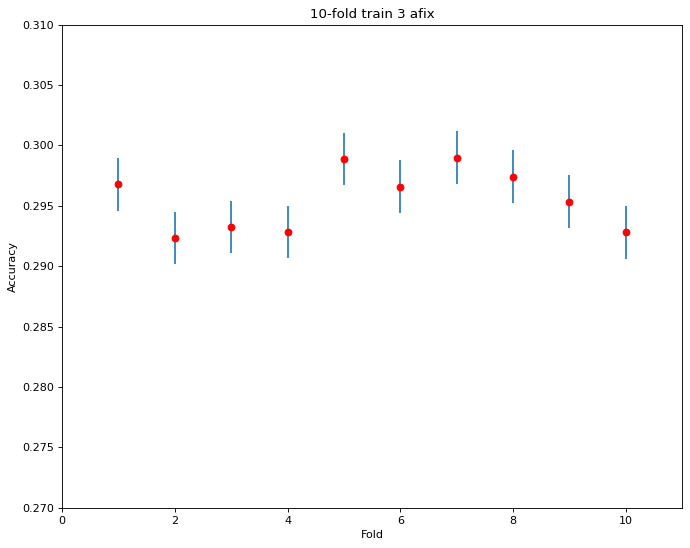

In [ ]:
plot_affix(results_dic[3], ics_dic[3], 3)

In [ ]:
from nltk.tag import tnt

In [ ]:
def train_model_tnt(train, test, affix_length, enable_afix=True):

  num_words_train = 0
    
  for sentence in train:
    for word in sentence:
      num_words_train += 1

  #Entrenar modelos
  if (enable_afix):
    aff_tagger = AffixTagger(train, affix_length=-affix_length)
    tnt_tagger = tnt.TnT(unk=aff_tagger, Trained=True)
  else:
     tnt_tagger = tnt.TnT()

  tnt_tagger.train(train)

  #Evaluar modelos
  tnt_eval = tnt_tagger.evaluate(test)

  ic = (1.96 *(sqrt((tnt_eval * (1-tnt_eval)) / num_words_train)))

  return tnt_eval, ic

In [ ]:
results = []
ics = []

for i in range(partitions):
  
  test = cross_val_data_redu[i]
  train = list(itertools.chain.from_iterable([cross_val_data_redu[j] for j in range(partitions) if i is not j]))
  
  x,y = train_model_tnt(train, test, 3)

  results.append(x)
  ics.append(y)

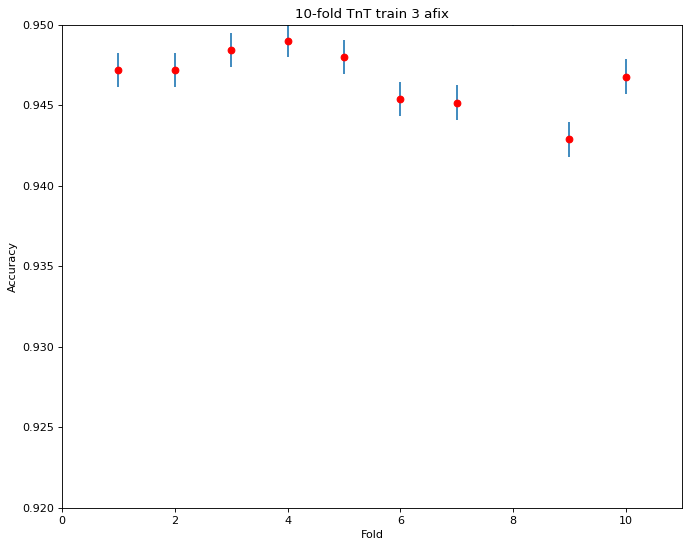

In [ ]:
  figure(figsize=(10, 8), dpi=80)
  x=[i for i in range(1, 1+len(results))]
  y= results
  plt.axis([0, len(results)+1, 0.92, .95])
  plt.ylabel('Accuracy')
  plt.xlabel('Fold')
  plt.title(f"{partitions}-fold TnT train 3 afix")
  plt.plot(x,y,'ro')
  plt.errorbar(x, y, yerr=ics, linestyle='None')
  plt.show()

In [ ]:
results = []
ics = []

for i in range(partitions):

  test = cross_val_data_redu[i]
  train = list(itertools.chain.from_iterable([cross_val_data_redu[j] for j in range(partitions) if i is not j]))
  
  x,y = train_model_tnt(train, test, 0, False)

  results.append(x)
  ics.append(y)

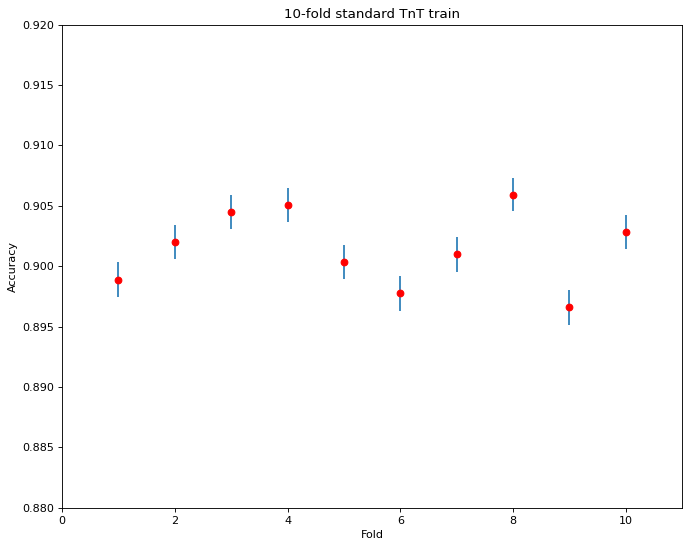

In [ ]:
  figure(figsize=(10, 8), dpi=80)
  x=[i for i in range(1, 1+len(results))]
  y= results
  plt.axis([0, len(results)+1, 0.88, .92])
  plt.ylabel('Accuracy')
  plt.xlabel('Fold')
  plt.title(f"{partitions}-fold standard TnT train")
  plt.plot(x,y,'ro')
  plt.errorbar(x, y, yerr=ics, linestyle='None')
  plt.show()

## Tarea 4

Evaluación del resto de etiquetadores.

Se deberán utilizar otros paradigmas de etiquetado. Como mínimo el etiquetador de Brill y algún otro como, CRF, perceptron. Se deberá realizar una comparativa de prestaciones respecto a los etiquetadores tnt y hmm, utilizando el juego de categorías reducido.
Cuando se utilice el etiquetador de Brill, probar con diferentes etiquetados iniciales, por ejemplo probar con Unigram Tagger y con hmm tagger.
La comparación puede ser sólo de una partición, si el coste temporal de la validación cruzada requiere mucho tiempo.

In [ ]:
import nltk
from nltk.corpus import cess_esp
nltk.download('cess_esp')
from nltk.tag import UnigramTagger, BigramTagger, TrigramTagger, CRFTagger, tnt, hmm, brill, brill_trainer, PerceptronTagger
!pip install python-crfsuite
import pycrfsuite
import itertools
from numpy import sqrt

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


In [ ]:
test = cross_val_data_redu[9]
train = list(itertools.chain.from_iterable([cross_val_data_redu[i] for i in range(partitions-1)]))
print(train)

[[('El', 'da'), ('ariete', 'nc'), (',', 'Fc'), ('sancionado', 'aq'), ('con', 'sp'), ('dos', 'dn'), ('partidos', 'nc'), ('por', 'sp'), ('una', 'di'), ('acción', 'nc'), ('que', 'pr'), ('el', 'da'), ('colegiado', 'nc'), ('Medina_Cantalejo', 'np'), ('consideró', 'vmi'), ('"', 'Fe'), ('agresión', 'nc'), ('al', 'sp'), ('contrario', 'nc'), ('"', 'Fe'), ('durante', 'sp'), ('el', 'da'), ('pasado', 'aq'), ('sábado', 'W'), ('en', 'sp'), ('el', 'da'), ('Nou_Camp', 'np'), (',', 'Fc'), ('consideró', 'vmi'), ('"', 'Fe'), ('injusta', 'aq'), ('"', 'Fe'), ('su', 'dp'), ('sanción', 'nc'), ('e', 'cc'), ('ironizó', 'vmi'), ('al', 'sp'), ('añadir', 'vmn'), (':', 'Fd'), ('"', 'Fe'), ('si', 'cs'), ('es', 'vsi'), ('preciso', 'aq'), ('lucharemos', 'vmi'), ('también', 'rg'), ('contra', 'sp'), ('policías', 'nc'), ('y', 'cc'), ('contra', 'sp'), ('periodistas', 'nc'), ('"', 'Fe'), ('.', 'Fp')], [('Dijo', 'vmi'), ('que', 'cs'), ('el', 'da'), ('PP', 'np'), ('se', 'p0'), ('comporta', 'vmi'), ('de', 'sp'), ('forma', 'n

In [ ]:
# Brill con unigramas
unigram_tagger = UnigramTagger(train)
brill.Template._cleartemplates()
template = brill.brill24()
brill_trainer_unigram = nltk.tag.brill_trainer.BrillTaggerTrainer(unigram_tagger, template)
brill_tagger_unigram = brill_trainer_unigram.train(train)
brill_unigram_eval = brill_tagger_unigram.evaluate(test)
print(brill_unigram_eval)

0.9009569628196412


In [ ]:
# Brill con bigramas
bigram_tagger = BigramTagger(train)
brill.Template._cleartemplates()
template = brill.brill24()
brill_trainer_bigram = nltk.tag.brill_trainer.BrillTaggerTrainer(bigram_tagger, template)
brill_tagger_bigram = brill_trainer_bigram.train(train)
brill_bigram_eval = brill_tagger_bigram.evaluate(test)
print(brill_bigram_eval)

0.7690738900800084


In [ ]:
# Brill con trigramas
trigram_tagger = TrigramTagger(train)
brill.Template._cleartemplates()
template = brill.brill24()
brill_trainer_trigram = nltk.tag.brill_trainer.BrillTaggerTrainer(trigram_tagger, template)
brill_tagger_trigram = brill_trainer_trigram.train(train)
brill_trigram_eval = brill_tagger_trigram.evaluate(test)
print(brill_trigram_eval)

0.7480520838780526


In [ ]:
# Brill con HMM
hmm_tagger = hmm.HiddenMarkovModelTagger.train(train)
brill.Template._cleartemplates()
template = brill.brill24()
brill_trainer_hmm = nltk.tag.brill_trainer.BrillTaggerTrainer(hmm_tagger, template)
brill_tagger_hmm = brill_trainer_hmm.train(train)
brill_hmm_eval = brill_tagger_hmm.evaluate(test)
print(brill_hmm_eval)

0.9289860377555823


In [ ]:
# CRF
crf_tagger = CRFTagger()
crf_tagger.train(train, 'model.crf.tagger')
crf_eval = crf_tagger.evaluate(test)
print(crf_eval)

0.9574857501438059


In [ ]:
# Perceptron
perceptron_tagger = PerceptronTagger(load=False)
perceptron_tagger.train(train)
perceptron_eval = perceptron_tagger.evaluate(test)
print(perceptron_eval)

0.9676828949432621


In [ ]:
# HMM
hmm_tagger = hmm.HiddenMarkovModelTagger.train(train)
hmm_eval = hmm_tagger.evaluate(test)
print(hmm_eval)

0.9259007477906186


In [ ]:
# TNT
test = cross_val_data_redu[9]
train = list(itertools.chain.from_iterable([cross_val_data_redu[i] for i in range(partitions-1)]))
tnt_tagger = tnt.TnT()
tnt_train = tnt_tagger.train(train)
tnt_eval = tnt_tagger.evaluate(test)
print(tnt_eval)

0.9028395126287716


[0.0014213621340826866, 0.002005216627315104, 0.002065675256883218, 0.001222129449747496, 0.0009600064777857705, 0.0008414406730028147, 0.0012463208876931171, 0.0014092591547456078]


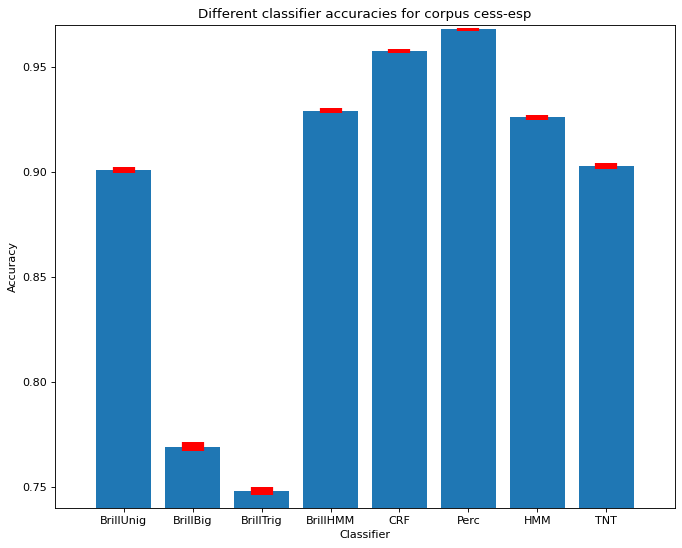

In [ ]:
# plot con todos los clasificadores
clasificadores = ['BrillUnig', 'BrillBig', 'BrillTrig', 'BrillHMM', 'CRF', 'Perc', 'HMM', 'TNT']
evaluaciones = [brill_unigram_eval, brill_bigram_eval, brill_trigram_eval, brill_hmm_eval, crf_eval, perceptron_eval, hmm_eval, tnt_eval]
ics = []
num_words_train = 0
   
for sentence in train:
  for word in sentence:
    num_words_train += 1

for e in evaluaciones:
  ics.append(1.96 *(sqrt((e * (1-e)) / num_words_train)))

print(ics)

figure(figsize=(10, 8), dpi=80)
x= clasificadores
y= evaluaciones
plt.axis([-1, len(clasificadores), 0.74, .97])
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.title(f"Different classifier accuracies for corpus cess-esp")
plt.bar(clasificadores, evaluaciones)
plt.errorbar(x, y, yerr=ics, linestyle='None', linewidth=20, color='red', barsabove=True)
plt.show()


## Tarea 5

Realizar un estudio de la herramienta Freeling. 

Considerar diferentes aspectos: facilidad/problemas de instalación, facilidad de uso, documentación, funcionalidad, etc. Esta herramienta de libre distribución se puede obtener en la siguiente dirección http://nlp.lsi.upc.edu/freeling/

Usar Freeling para realizar el etiquetado morfosintáctico del texto del fichero Alicia.txt. Se debe entregar un fichero tipo texto con el formato: palabra/etiqueta